In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,accuracy_score
from mlxtend.plotting import plot_decision_regions

In [70]:
data = pd.read_csv("/Users/omgajipara/Desktop/Data Science/Supervised Learning/Classification/DecisionTree/DesicionTree.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [71]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

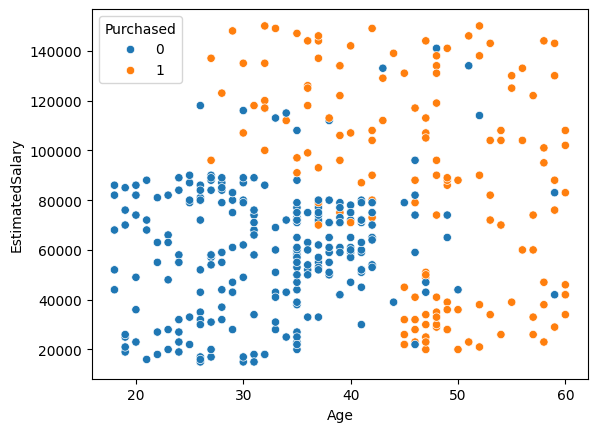

In [72]:
sns.scatterplot(x='Age',y="EstimatedSalary",data=data,hue="Purchased")

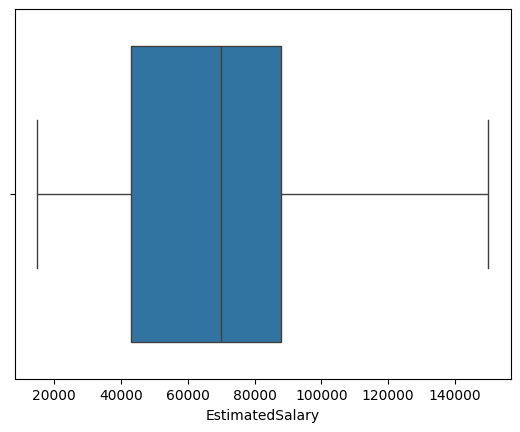

In [73]:
sns.boxplot(x="EstimatedSalary",data=data)
plt.show()

In [74]:
'''
laben = LabelEncoder()
data['Gender'] = laben.fit_transform(data['Gender'])'''

"\nlaben = LabelEncoder()\ndata['Gender'] = laben.fit_transform(data['Gender'])"

In [75]:
X = data.drop(['Purchased', 'User ID','Gender'], axis=1)
y=data['Purchased']

In [76]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Find best random_state
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)
    model = DecisionTreeClassifier(max_depth=4)
    model.fit(X_train, y_train)
    
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"✅ Best Accuracy: {best_score:.4f} at random_state = {best_state}")


✅ Best Accuracy: 0.9500 at random_state = 0


In [78]:

# Step 2: Use best_state to split again
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=best_state)

# Step 3: Find best max_depth with least train-test accuracy difference
best_depth = None
min_diff = float('inf')

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    diff = abs(train_acc - test_acc)

    print(f"Depth: {depth}, Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}, Diff: {diff:.3f}")

    if diff < min_diff:
        min_diff = diff
        best_depth = depth

print(f"\n✅ Best max_depth: {best_depth} with min accuracy diff: {min_diff:.3f}")


Depth: 1, Train Acc: 0.816, Test Acc: 0.925, Diff: 0.109
Depth: 2, Train Acc: 0.909, Test Acc: 0.950, Diff: 0.041
Depth: 3, Train Acc: 0.912, Test Acc: 0.950, Diff: 0.037
Depth: 4, Train Acc: 0.925, Test Acc: 0.950, Diff: 0.025
Depth: 5, Train Acc: 0.938, Test Acc: 0.938, Diff: 0.000
Depth: 6, Train Acc: 0.950, Test Acc: 0.887, Diff: 0.062
Depth: 7, Train Acc: 0.963, Test Acc: 0.925, Diff: 0.037
Depth: 8, Train Acc: 0.975, Test Acc: 0.925, Diff: 0.050
Depth: 9, Train Acc: 0.981, Test Acc: 0.912, Diff: 0.069
Depth: 10, Train Acc: 0.984, Test Acc: 0.912, Diff: 0.072
Depth: 11, Train Acc: 0.991, Test Acc: 0.900, Diff: 0.091
Depth: 12, Train Acc: 0.991, Test Acc: 0.900, Diff: 0.091
Depth: 13, Train Acc: 0.994, Test Acc: 0.912, Diff: 0.081
Depth: 14, Train Acc: 0.997, Test Acc: 0.900, Diff: 0.097
Depth: 15, Train Acc: 0.997, Test Acc: 0.900, Diff: 0.097
Depth: 16, Train Acc: 0.997, Test Acc: 0.900, Diff: 0.097
Depth: 17, Train Acc: 0.997, Test Acc: 0.900, Diff: 0.097
Depth: 18, Train Acc: 0

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [80]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [81]:
dtc.score(x_test,y_test)

0.95

In [82]:
import pandas as pd

new_data = [[46,41000]]
columns = [ 'Age', 'EstimatedSalary']

new_data_df = pd.DataFrame(new_data, columns=columns)

new_data_scaled = scaler.transform(new_data_df)
prediction = model.predict(new_data_scaled)
if prediction==0:
    print("Predicted outcome (0=No purchase, 1=purchase):", prediction,"No purchase")
else:
    print("Predicted outcome (0=No purchase, 1=purchase):", prediction,"purchase")


Predicted outcome (0=No purchase, 1=purchase): [1] purchase


In [83]:
from sklearn.tree import plot_tree

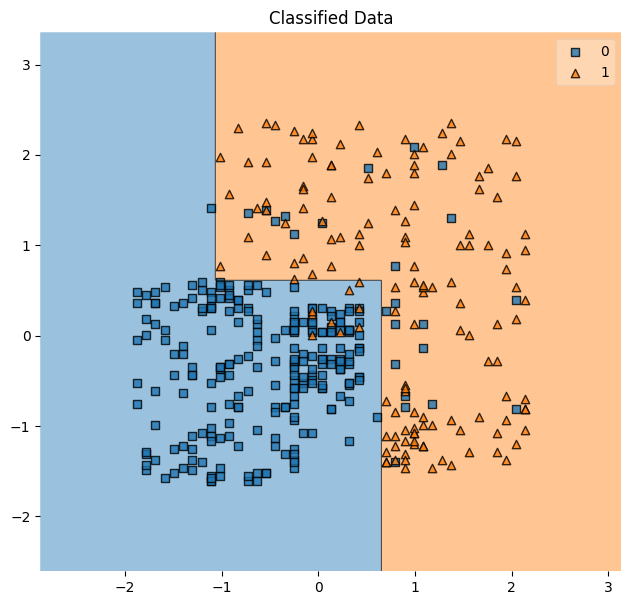

In [84]:
import numpy as np
#plt.figure(figsize=(7.5,7))
plt.figure(figsize=(7.5,7))

plot_decision_regions(x_scaled, y.to_numpy().astype(np.int_), clf=dtc)
plt.title("Classified Data")
plt.savefig("/Users/omgajipara/Desktop/Data Science/Supervised Learning/Classification/DecisionTree/images/DesicionTreeClassified.jpg")
plt.savefig("assets/DesicionTreeClassified.jpg")
plt.show()


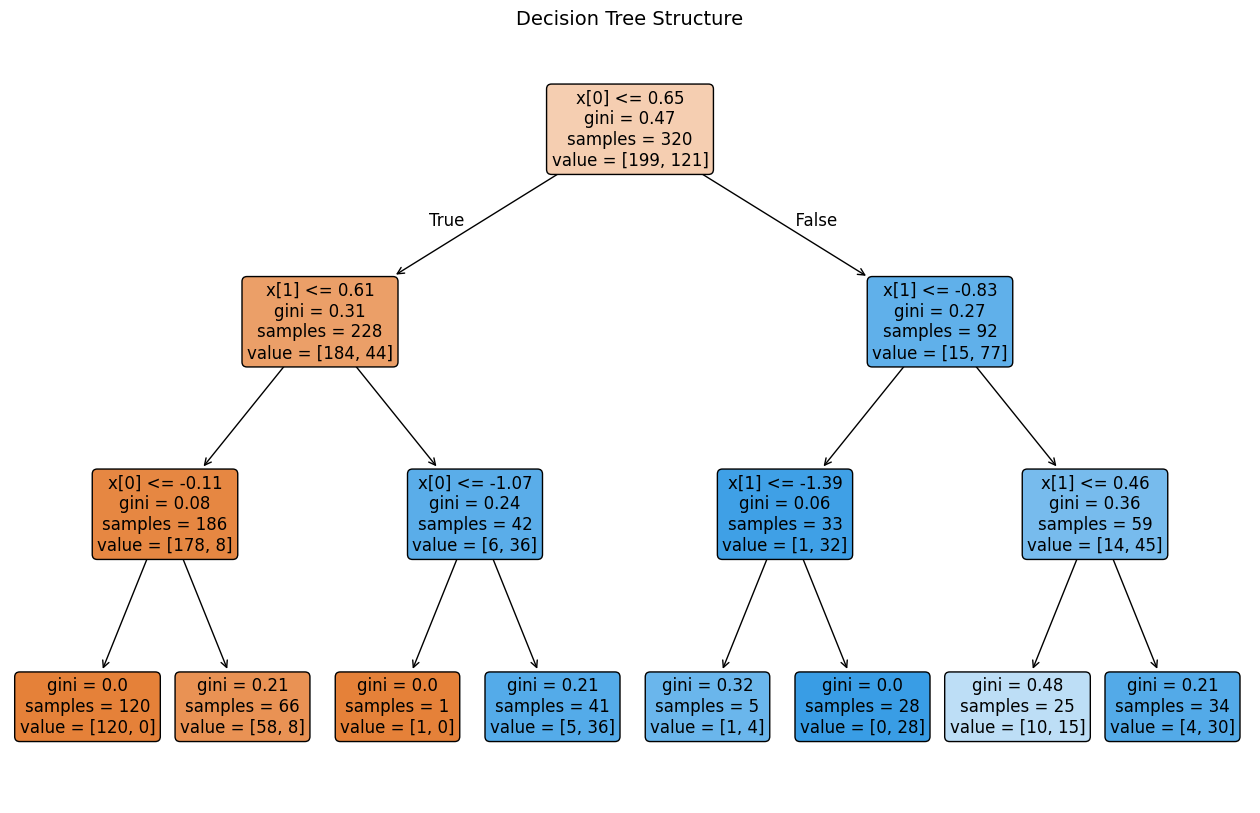

In [85]:
plt.figure(figsize=(16,10))  # Bigger overall canvas
plot_tree(
    dtc, 
    filled=True, 
    rounded=True, 
    fontsize=12,   # Increase text size
    precision=2    # Optional: show 2 decimal points
)
plt.title("Decision Tree Structure", fontsize=14)
plt.savefig("assets/DesicionTree.jpg")
plt.show()
